In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [ ]:
sb.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'tips',
 'titanic']

In [ ]:
data=sb.load_dataset("iris")

In [ ]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
#EDA

In [ ]:
iris=data.isnull().sum()

In [ ]:
iris

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [ ]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
mycorr=data.corr()
mycorr

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


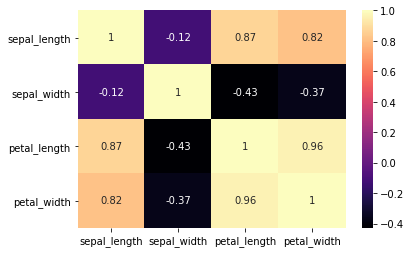

In [ ]:
sb.heatmap(mycorr,annot=True,linecolor="r" ,cmap="magma")

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
LE=LabelEncoder()

In [ ]:
data['species']=LE.fit_transform(data['species'])

In [ ]:
x_ind=data.drop("species",axis=1)

In [ ]:
x_ind

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
y_dep=data.species

In [ ]:
y_dep

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x_ind,y_dep,test_size=0.2,random_state=5)

## ***Prediction***

In [ ]:
from sklearn import tree

In [ ]:
model=tree.DecisionTreeClassifier()
model_fit=model.fit(x_train,y_train)

In [ ]:
y_pred=model_fit.predict(x_test)

**Acurracy and Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [ ]:
confusion_matrix(y_test,y_pred)

array([[ 8,  0,  0],
       [ 0,  9,  2],
       [ 0,  0, 11]])

In [ ]:
acc=accuracy_score(y_test,y_pred)
acc

0.9333333333333333

# *Decision* *Tree* 

In [ ]:
import graphviz
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [ ]:
x_train.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [ ]:
data=StringIO()
export_graphviz(model_fit,out_file=data,filled=True,rounded=True,special_characters=True,
                feature_names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

In [ ]:
graph=pydotplus.graph_from_dot_data(data.getvalue())

In [ ]:
graph.write_jpg('Decision.jpg')

True

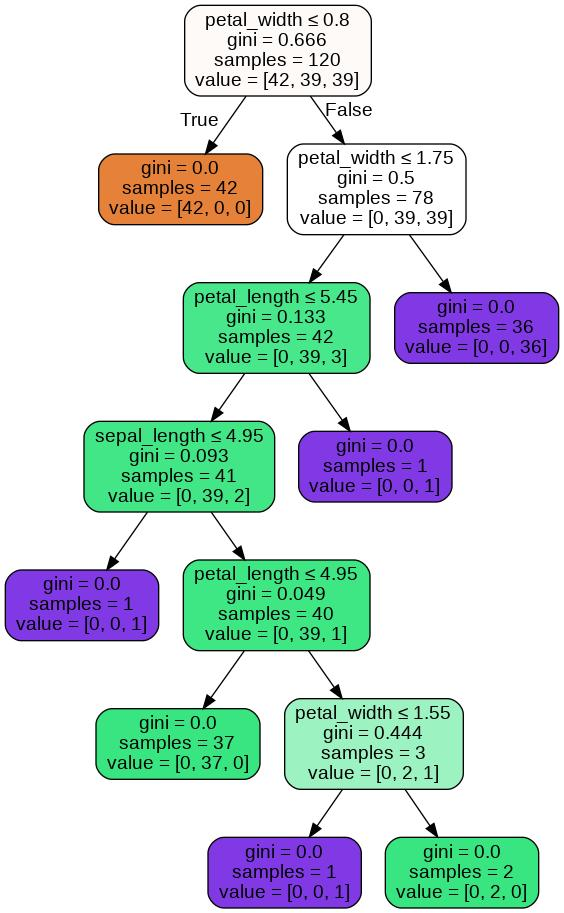

In [ ]:
Image(graph.create_jpg())

To Check the Best suitable Descision Tree Model

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
parameters={"max_depth":(10,20,30,40,50,60,70,100),"criterion":("gini","entropy")
            ,"max_features":("auto","sqrt","log2"),"min_samples_split":(2,4,6)
           }

In [ ]:
DT_grid=RandomizedSearchCV(tree.DecisionTreeClassifier(),
                           param_distributions=parameters,cv=5)

In [ ]:
DT_grid.fit(x_train,y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=None,
          

In [ ]:
DT_grid.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=20, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
model=tree.DecisionTreeClassifier(class_weight=None, criterion='gini',
                       max_depth=20, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
model_fit=model.fit(x_train,y_train)                      

In [ ]:
y_pred=model_fit.predict(x_test)

In [ ]:
confusion_matrix(y_test,y_pred)

array([[ 8,  0,  0],
       [ 0,  8,  3],
       [ 0,  1, 10]])

In [ ]:
acc=accuracy_score(y_test,y_pred)
acc

0.8666666666666667

In [ ]:
data=StringIO()
export_graphviz(model_fit,out_file=data,filled=True,rounded=True,special_characters=True,
                feature_names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

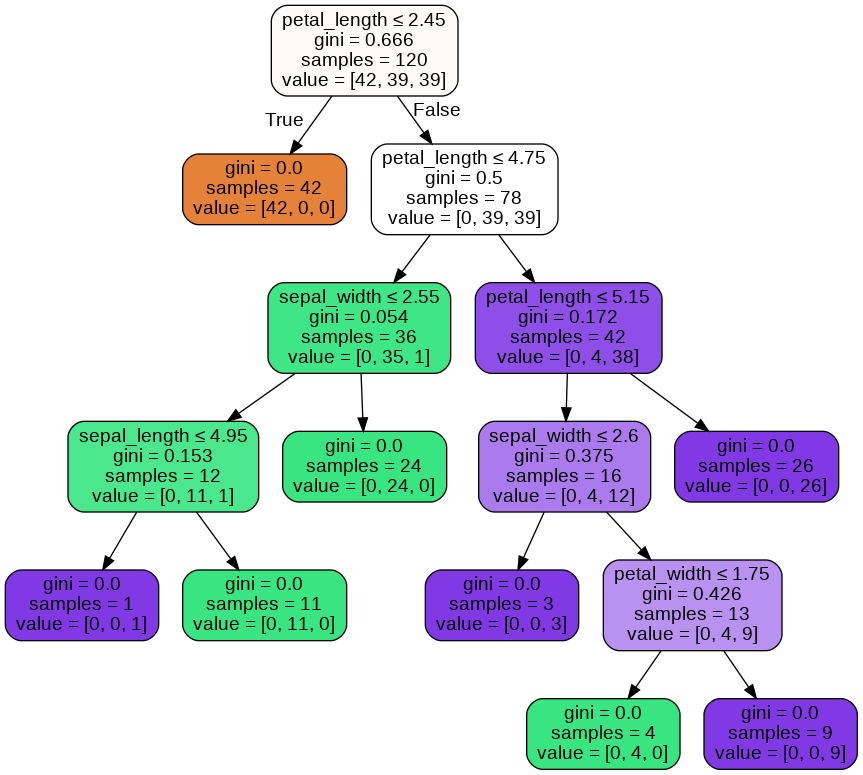

In [ ]:
graph=pydotplus.graph_from_dot_data(data.getvalue())
graph.write_png('Decision.png')
Image(graph.create_png())